## Policy Extraction Study ##

In [21]:
import matplotlib.pyplot as plt

In [22]:
# read the csv file
df = pd.read_csv("data/tdmpc2_policy_extraction_study.csv")

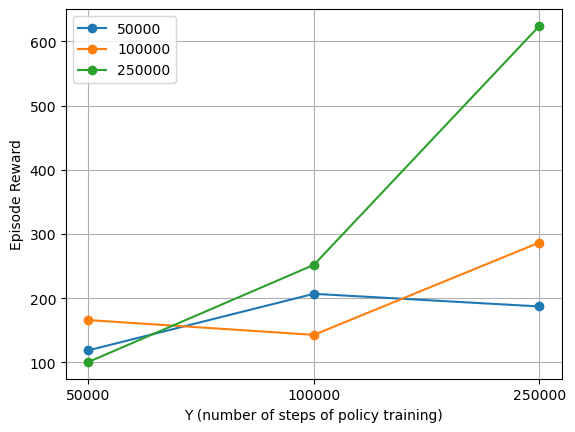

In [23]:
# create a plot: 
# - x-axis is the number of steps of policy extraction and y-axis is the reward

X = [50000, 100000, 250000] # supervised model checkpoints

plt1 = plt.figure()
plt.ylabel('Episode Reward')
plt.xlabel('Y (number of steps of policy training)')
plt.xticks(range(len(X)), X)

for i in range(len(X)):

    df1 = df.filter(like="/" + str(X[i]) + ".pt")
    
    # average the columns (similar to wandb grouping)
    df1 = df1.mean(axis=1)

    # time weighted ema smoothing of 0.95
    # df1 = df1.ewm(alpha=0.05).mean()

    # remove nan values
    df1 = df1.dropna()

    # calculate the difference between each row
    diff = df1.diff()
    
    # let each index be the cumulative sum of the differences up to that point (i.e. the reward at that point) divided by the number of steps up to that point (i.e. the step number)
    reward = diff.cumsum()
    # diff = diff.cumsum() / range(1, len(diff)+1)
    
    # values of X where X % 2500 == 0 (model was saved every 2500 steps)
    idx = [i / 2500 for i in X]

    # only plot idx
    reward = reward[idx]

    # label each line with the model name
    plt.plot(range(len(reward)), reward, label=X[i], marker='o')

plt.legend()
plt.grid()
plt.show()

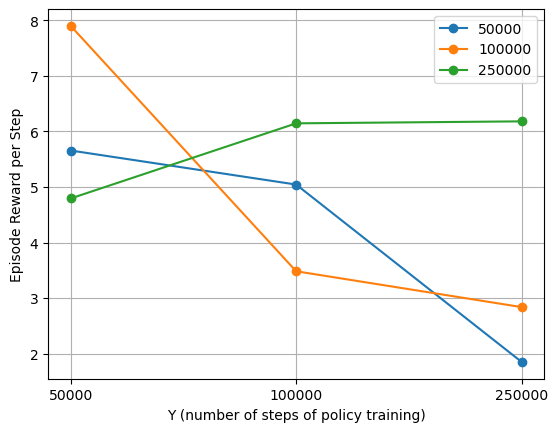

In [24]:
# create a plot: 
# - x-axis is the number of steps of policy extraction and y-axis is the reward per step

X = [50000, 100000, 250000] # supervised model checkpoints

plt1 = plt.figure()
plt.ylabel('Episode Reward per Step')
plt.xlabel('Y (number of steps of policy training)')
plt.xticks(range(len(X)), X)

for i in range(len(X)):

    df1 = df.filter(like="/" + str(X[i]) + ".pt")
    
    # average the columns (similar to wandb grouping)
    df1 = df1.mean(axis=1)

    # time weighted ema smoothing of 0.95
    # df1 = df1.ewm(alpha=0.05).mean()

    # remove nan values
    df1 = df1.dropna()

    # calculate the difference between each row
    diff = df1.diff()
    
    # let each index be the cumulative sum of the differences up to that point (i.e. the reward at that point) divided by the number of steps up to that point (i.e. the step number)
    reward_per_step = diff.cumsum() / range(1, len(diff)+1)
    
    # values of X where X % 2500 == 0 (model was saved every 2500 steps)
    idx = [i / 2500 for i in X]

    # only plot idx
    reward_per_step = reward_per_step[idx]

    # label each line with the model name
    plt.plot(range(len(reward_per_step)), reward_per_step, label=X[i], marker='o')

plt.legend()
plt.grid()
plt.show()